# CS498DL Assignment 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from kaggle_submission import output_submission_csv
from models.neural_net import NeuralNetwork
from utils.data_process import get_CIFAR10_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [2]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 10000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and other hyperparameters on the CIFAR-10 dataset below.

### 2 Layers SGD Training

In [30]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 40
batch_size = 200
learning_rate = 0.05
learning_rate_decay = 0.85
regularization = 0.0004

# Initialize a new neural network model
sgd_2_net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
sgd_2_train_loss = np.zeros(epochs)
sgd_2_train_accuracy = np.zeros(epochs)
sgd_2_val_accuracy = np.zeros(epochs)
sgd_2_test_accuracy = np.zeros(epochs)
learning_rates = np.zeros(epochs)

# For each epoch...
for epoch in tqdm(range(epochs)):
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
            batch_indices = np.random.choice(TRAIN_IMAGES, batch_size)
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]  
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
            pred_probs = sgd_2_net.forward(X_batch) # <- scores (200, 10)
            pred = np.argmax(pred_probs, axis = 1)
            sgd_2_train_accuracy[epoch] += (pred == y_batch).mean()/batch_size

        # Run the backward pass of the model to compute the loss, and update the weights
            loss = sgd_2_net.backward(y_batch,regularization)
            sgd_2_train_loss[epoch] += loss
            sgd_2_net.update(learning_rate, 0.5)
    
    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    vals_probs = sgd_2_net.forward(X_val)
    val_pred = np.argmax(vals_probs, axis =1)
    val_acc = (val_pred == y_val).mean()
    sgd_2_val_accuracy[epoch] += val_acc
    
    
    
    learning_rate *= learning_rate_decay
    learning_rates[epoch] = learning_rate

100%|██████████| 40/40 [01:19<00:00,  1.99s/it]


### Plot

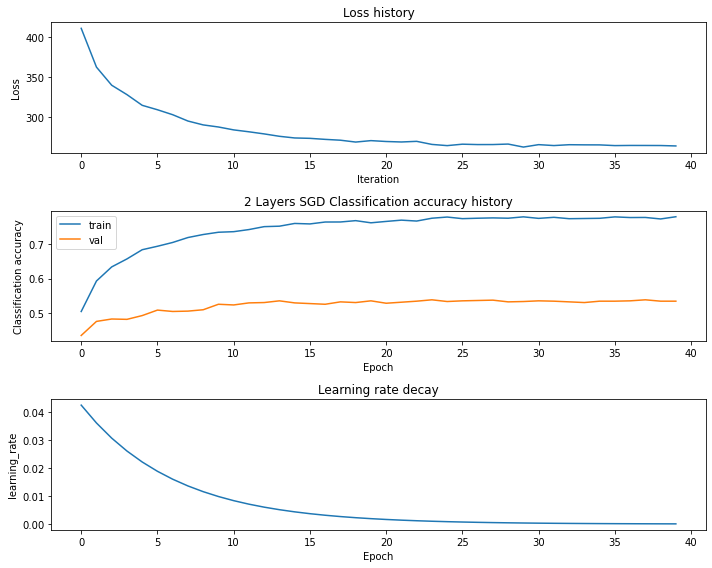

In [31]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(sgd_2_train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(sgd_2_train_accuracy, label='train')
plt.plot(sgd_2_val_accuracy, label='val')
plt.title('2 Layers SGD Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(learning_rates)
plt.title('Learning rate decay')
plt.xlabel('Epoch')
plt.ylabel('learning_rate')

plt.tight_layout()
plt.show()

### 3 Layers SGD Training

In [15]:
# Hyperparameters 
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 40
batch_size = 200
learning_rate = 0.05
learning_rate_decay = 0.85
regularization = 0.0004

# Initialize a new neural network model
sgd_3_net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
sgd_3_train_loss = np.zeros(epochs)
sgd_3_train_accuracy = np.zeros(epochs)
sgd_3_val_accuracy = np.zeros(epochs)
learning_rates = np.zeros(epochs)

# For each epoch...
for epoch in tqdm(range(epochs)):
#     print('epoch:', epoch)
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
            batch_indices = np.random.choice(TRAIN_IMAGES, batch_size)
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]  
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
            pred_probs = sgd_3_net.forward(X_batch) # <- scores (200, 10)
#             print(pred_probs.sum(axis =1, keepdims = True))
            pred = np.argmax(pred_probs, axis = 1)
#             acc /= batch_size
            sgd_3_train_accuracy[epoch] += (pred == y_batch).mean()/batch_size

        # Run the backward pass of the model to compute the loss, and update the weights
            loss = sgd_3_net.backward(y_batch,regularization)
            sgd_3_train_loss[epoch] += loss
            sgd_3_net.update(learning_rate, 0.5)

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    vals_probs = sgd_3_net.forward(X_val)
    val_pred = np.argmax(vals_probs, axis =1)
    val_acc = (val_pred == y_val).mean()
    sgd_3_val_accuracy[epoch] += val_acc
    
    
    learning_rate *= learning_rate_decay
    learning_rates[epoch] = learning_rate

100%|██████████| 40/40 [01:25<00:00,  2.14s/it]


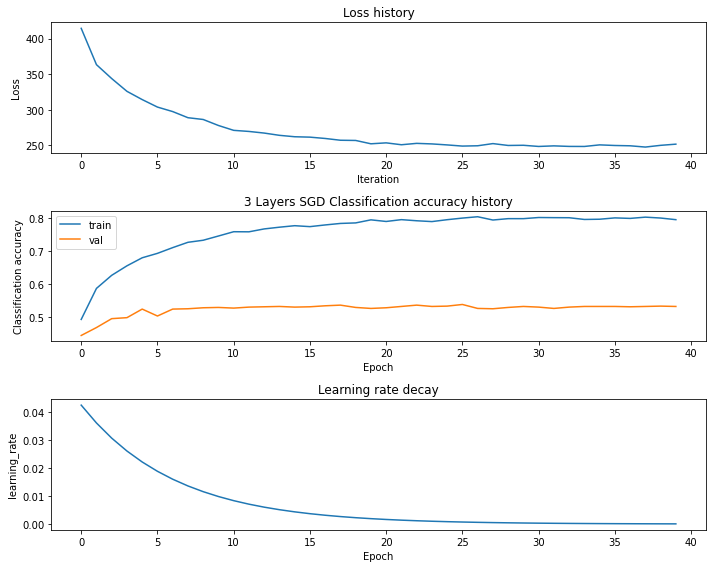

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(sgd_3_train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(sgd_3_train_accuracy, label='train')
plt.plot(sgd_3_val_accuracy, label='val')
plt.title('3 Layers SGD Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(learning_rates)
plt.title('Learning rate decay')
plt.xlabel('Epoch')
plt.ylabel('learning_rate')

plt.tight_layout()
plt.show()

## Train using Adam
Next we will train the same model using the Adam optimizer. You should take the above code for SGD and modify it to use Adam instead. For implementation details, see the lecture slides. The original paper that introduced Adam is also a good reference, and contains suggestions for default values: https://arxiv.org/pdf/1412.6980.pdf

### 2 Layers Adam Training

In [20]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 40
batch_size = 200
learning_rate = 0.0003
learning_rate_decay = 0.85
regularization = 0.00001
b1 = 0.7
b2 = 0.79
eps = 1e-8
opt = "Adam"

# Initialize a new neural network model
adam_2_net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
adam_2_train_loss = np.zeros(epochs)
adam_2_train_accuracy = np.zeros(epochs)
adam_2_val_accuracy = np.zeros(epochs)
learning_rates = np.zeros(epochs)


# For each epoch...
for epoch in tqdm(range(epochs)):
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
            batch_indices = np.random.choice(TRAIN_IMAGES, batch_size)
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]  
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
            pred_probs = adam_2_net.forward(X_batch) # <- scores (200, 10)
            pred = np.argmax(pred_probs, axis = 1)
            adam_2_train_accuracy[epoch] += (pred == y_batch).mean()/batch_size

        # Run the backward pass of the model to compute the loss, and update the weights
            loss = adam_2_net.backward(y_batch, regularization)
            adam_2_train_loss[epoch] += loss
            adam_2_net.update(learning_rate, b1, b2, eps, opt, epoch+1)

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    vals_probs = adam_2_net.forward(X_val)
    val_pred = np.argmax(vals_probs, axis =1)
    val_acc = (val_pred == y_val).mean()
    adam_2_val_accuracy[epoch] += val_acc
    
    
    
    # Implement learning rate decay
    learning_rate *= learning_rate_decay
    learning_rates[epoch] = learning_rate

100%|██████████| 40/40 [02:02<00:00,  3.06s/it]


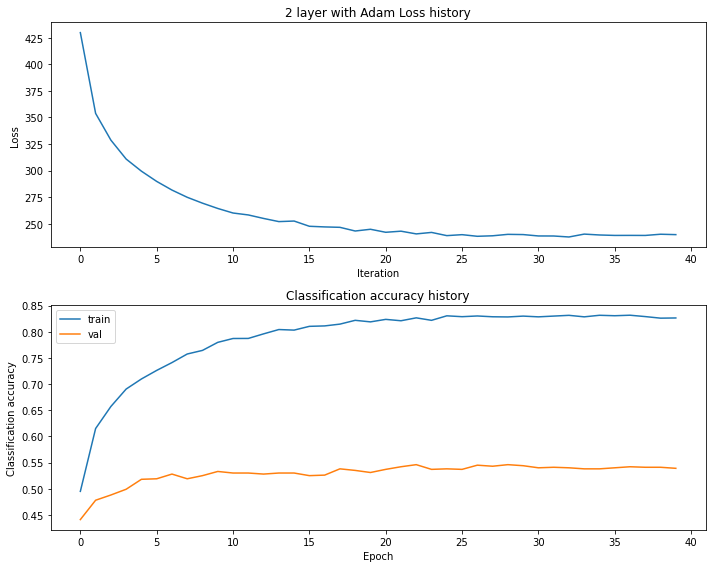

In [21]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(adam_2_train_loss)
plt.title('2 layer with Adam Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(adam_2_train_accuracy, label='train')
plt.plot(adam_2_val_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 3 Layers Adam Training

In [22]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 40
batch_size = 200
learning_rate = 0.0003
learning_rate_decay = 0.85
regularization = 0.00001
b1 = 0.7
b2 = 0.79
eps = 1e-8
opt = "Adam"

# Initialize a new neural network model
adam_3_net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
adam_3_train_loss = np.zeros(epochs)
adam_3_train_accuracy = np.zeros(epochs)
adam_3_val_accuracy = np.zeros(epochs)
learning_rates = np.zeros(epochs)

# For each epoch...
for epoch in tqdm(range(epochs)):
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
            batch_indices = np.random.choice(TRAIN_IMAGES, batch_size)
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]  
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
            pred_probs = adam_3_net.forward(X_batch) # <- scores (200, 10)
#             print(pred_probs.sum(axis =1, keepdims = True))
            pred = np.argmax(pred_probs, axis = 1)
            adam_3_train_accuracy[epoch] += (pred == y_batch).mean()/batch_size

        # Run the backward pass of the model to compute the loss, and update the weights
            loss = adam_3_net.backward(y_batch,regularization)
            adam_3_train_loss[epoch] += loss
            adam_3_net.update(learning_rate, b1, b2, eps, opt, epoch+1)

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    vals_probs = adam_3_net.forward(X_val)
    val_pred = np.argmax(vals_probs, axis =1)
    val_acc = (val_pred == y_val).mean()
    adam_3_val_accuracy[epoch] += val_acc
    
    
    
    learning_rate *= learning_rate_decay
    learning_rates[epoch] = learning_rate

100%|██████████| 40/40 [02:20<00:00,  3.52s/it]


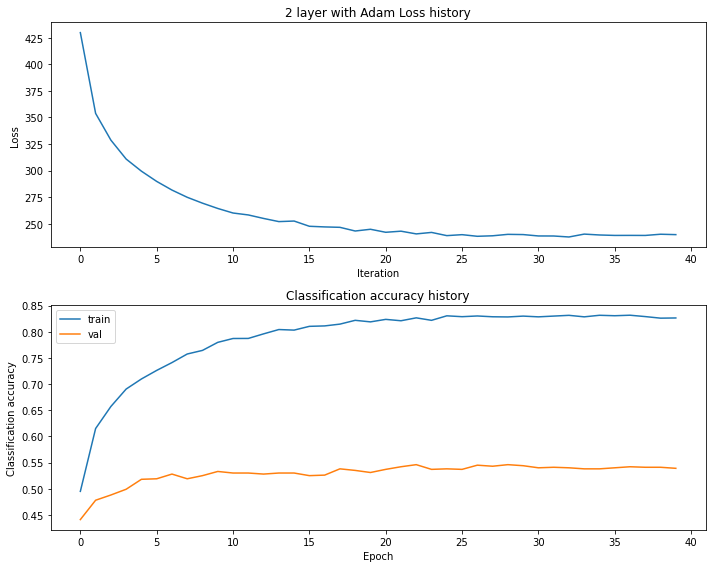

In [23]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(adam_2_train_loss)
plt.title('2 layer with Adam Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(adam_2_train_accuracy, label='train')
plt.plot(adam_2_val_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to a large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 

You will compare networks of two and three layers using the different optimization methods you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 

Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for-loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 

## Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [24]:
best_2layer_sgd_prediction = np.argmax(sgd_2_net.forward(X_test), axis = 1) 
best_3layer_sgd_prediction = np.argmax(sgd_3_net.forward(X_test), axis = 1) 
best_2layer_adam_prediction = np.argmax(adam_2_net.forward(X_test), axis = 1)
best_3layer_adam_prediction = np.argmax(adam_3_net.forward(X_test), axis =1) 

In [25]:
sgd_2_test_acc = (best_2layer_sgd_prediction == y_test).mean()
sgd_3_test_acc = (best_3layer_sgd_prediction == y_test).mean()
adam_2_test_acc = (best_2layer_adam_prediction == y_test).mean()
adam_3_test_acc = (best_3layer_adam_prediction == y_test).mean()
print(sgd_2_test_acc,sgd_3_test_acc,adam_2_test_acc,adam_3_test_acc)

0.4959 0.5204 0.5292 0.5278


## Kaggle output

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [ ]:
output_submission_csv('./nn_2layer_sgd_submission.csv', best_2layer_sgd_prediction)
output_submission_csv('./nn_3layer_sgd_submission.csv', best_3layer_sgd_prediction)
output_submission_csv('./nn_2layer_adam_submission.csv', best_2layer_sgd_prediction)
output_submission_csv('./nn_3layer_adam_submission.csv', best_2layer_sgd_prediction)

## Compare SGD and Adam
Create graphs to compare training loss and validation accuracy between SGD and Adam. The code is similar to the above code, but instead of comparing train and validation, we are comparing SGD and Adam.

## Compare 2 layer SGD and Adam

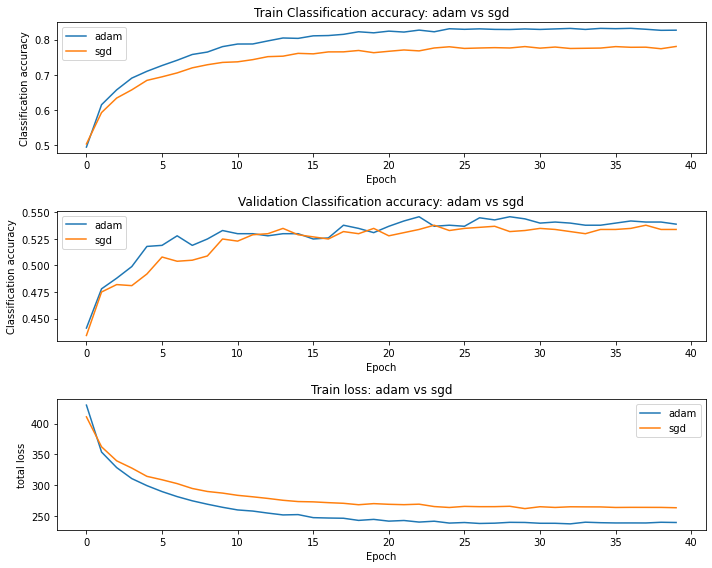

In [32]:
# TODO: implement me
plt.subplot(3,1,1)
plt.plot(adam_2_train_accuracy, label='adam')
plt.plot(sgd_2_train_accuracy, label='sgd')
plt.title('Train Classification accuracy: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3,1,2)
plt.plot(adam_2_val_accuracy, label='adam')
plt.plot(sgd_2_val_accuracy, label='sgd')
plt.title('Validation Classification accuracy: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3,1,3)
plt.plot(adam_2_train_loss, label='adam')
plt.plot(sgd_2_train_loss, label='sgd')
plt.title('Train loss: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('total loss')
plt.legend()

plt.tight_layout()
plt.show()

## Compare 3 layer SGD and Adam

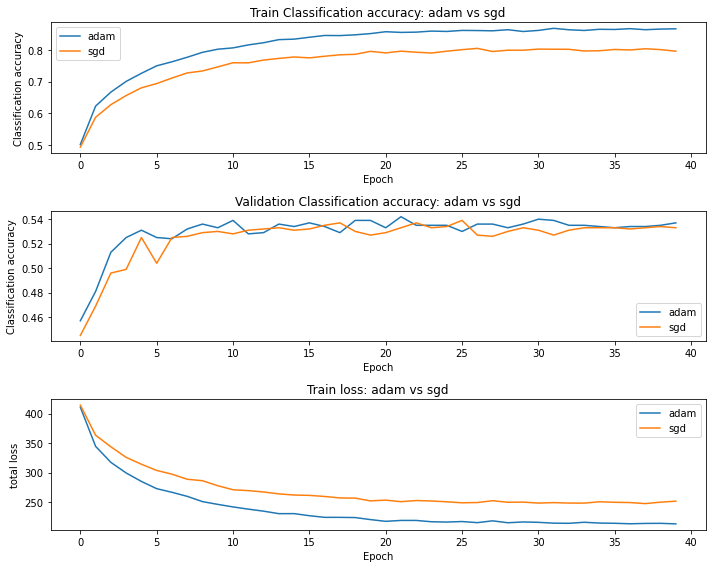

In [28]:
# TODO: implement me
plt.subplot(3,1,1)
plt.plot(adam_3_train_accuracy, label='adam')
plt.plot(sgd_3_train_accuracy, label='sgd')
plt.title('Train Classification accuracy: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3,1,2)
plt.plot(adam_3_val_accuracy, label='adam')
plt.plot(sgd_3_val_accuracy, label='sgd')
plt.title('Validation Classification accuracy: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.subplot(3,1,3)
plt.plot(adam_3_train_loss, label='adam')
plt.plot(sgd_3_train_loss, label='sgd')
plt.title('Train loss: adam vs sgd')
plt.xlabel('Epoch')
plt.ylabel('total loss')
plt.legend()

plt.tight_layout()
plt.show()